# 概率统计方法

**`Python`** 中常用的统计工具有 **`Numpy, Pandas, PyMC, StatsModels`** 等。

**`Scipy`** 中的子库 `scipy.stats` 中包含很多统计上的方法。

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

In [3]:
heights

array([ 1.46,  1.79,  2.01,  1.75,  1.56,  1.69,  1.88,  1.76,  1.88,  1.78])

In [4]:
heights.mean(),heights.min(),heights.max(),heights.std()

(1.7559999999999998, 1.46, 2.0099999999999998, 0.15081114017207078)

In [5]:
import scipy.stats.stats as st

In [8]:
print ('mode, ', st.mode(heights))           # 众数及其出现次数

mode,  ModeResult(mode=array([ 1.88]), count=array([2]))


In [9]:
st.skew(heights)       # 偏度

-0.3935244564726347

In [10]:
st.kurtosis(heights)   # 峰度

-0.33067209772439865

常见的[连续概率分布](https://zh.wikipedia.org/wiki/Category:%E8%BF%9E%E7%BB%AD%E5%88%86%E5%B8%83)有：

- 均匀分布
- 正态分布
- 学生`t`分布
- `F`分布
- `Gamma`分布
- ...

[离散概率分布](https://zh.wikipedia.org/wiki/Category:%E7%A6%BB%E6%95%A3%E5%88%86%E5%B8%83)：

- 伯努利分布
- 几何分布
- ...

这些都可以在 `scipy.stats` 中找到。

In [11]:
#正太分布

In [12]:
from scipy.stats import norm

它包含四类常用的函数：

- `norm.cdf` 返回对应的[累计分布函数](https://zh.wikipedia.org/wiki/%E7%B4%AF%E7%A7%AF%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0)值
- `norm.pdf` 返回对应的[概率密度函数](https://zh.wikipedia.org/wiki/%E6%A9%9F%E7%8E%87%E5%AF%86%E5%BA%A6%E5%87%BD%E6%95%B8)值
- `norm.rvs` 产生指定参数的随机变量
- `norm.fit` 返回给定数据下，各参数的[最大似然估计](https://zh.wikipedia.org/wiki/%E6%9C%80%E5%A4%A7%E4%BC%BC%E7%84%B6%E4%BC%B0%E8%AE%A1)（MLE）值

从正态分布产生500个随机点：

In [13]:
x_norm = norm.rvs(size=500)

In [14]:
x_norm

array([  1.31344761e+00,  -5.48894664e-01,  -5.25754983e-01,
        -1.91750088e+00,   7.25697921e-01,   5.04614525e-01,
        -1.31229839e-01,  -2.65033850e-01,  -3.86634691e-03,
         8.82038372e-01,  -6.84954369e-01,   1.74264839e+00,
         3.68640978e-01,  -9.25179514e-02,  -8.62056195e-01,
        -9.75536656e-01,   3.55850012e-01,   6.38179860e-01,
         6.36829698e-02,  -5.03008507e-01,  -5.97998950e-01,
         8.64990101e-01,   1.12654653e+00,  -1.92068420e+00,
         1.38925482e+00,  -7.83744156e-02,   3.06007337e-01,
         9.84811025e-02,   1.83725176e+00,   1.20301393e-01,
        -1.77250811e+00,   4.97364810e-01,  -5.56213383e-01,
        -9.09219931e-01,   1.19176843e+00,  -8.38429601e-01,
        -1.75978259e+00,   8.86934821e-02,  -2.35533204e-01,
         1.11198635e+00,   5.02752283e-01,   8.72275000e-01,
         1.39498662e+00,   3.43263435e-01,   5.76239245e-01,
         3.04884943e-01,  -1.11547445e+00,   9.22193477e-01,
         3.32632647e-01,

In [15]:
type(x_norm)

numpy.ndarray

In [16]:
#直方图

array([   7.,   17.,   42.,   98.,  122.,  107.,   75.,   27.,    3.,    2.])

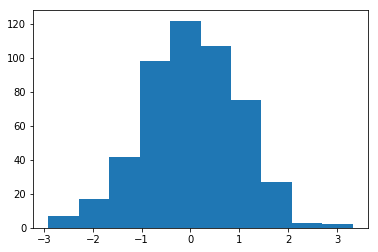

In [17]:
h = hist(x_norm)
h[0]

In [18]:
h

(array([   7.,   17.,   42.,   98.,  122.,  107.,   75.,   27.,    3.,    2.]),
 array([-2.90829371, -2.28521401, -1.66213431, -1.03905461, -0.41597492,
         0.20710478,  0.83018448,  1.45326418,  2.07634387,  2.69942357,
         3.32250327]),
 <a list of 10 Patch objects>)

In [19]:
# 归一化直方图（用出现频率代替次数），将划分区间变为 `20`（默认 `10`）：

/Users/zhangjianfeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


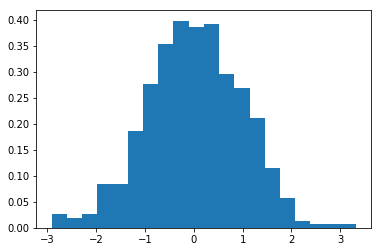

In [20]:
h = hist(x_norm,normed=True,bins=20)

In [21]:
x_mean,x_std = norm.fit(x_norm)

In [22]:
x_mean,x_std

(0.020922411671562374, 0.97983046439281918)

/Users/zhangjianfeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


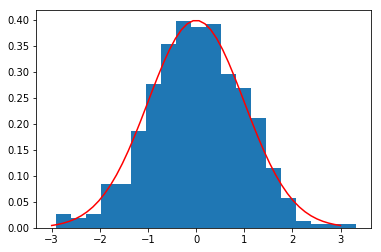

In [24]:
h = hist(x_norm, normed=True, bins=20)
# 将真实的概率密度函数与直方图进行比较：
x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

In [25]:
# 积分函数
from scipy.integrate import trapz

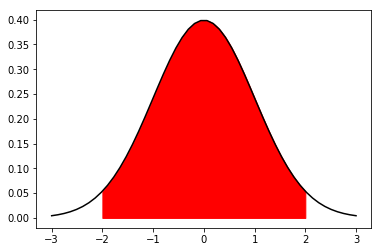

In [26]:
x1 = linspace(-2,2,108)
p = trapz(norm.pdf(x1),x1)

fill_between(x1, norm.pdf(x1), color = 'red')
plot(x, norm.pdf(x), 'k-')

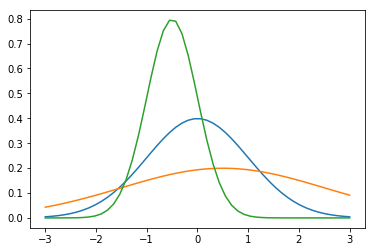

In [27]:
# 默认情况，正态分布的参数为均值0，标准差1，即标准正态分布
# 可以通过 `loc` 和 `scale` 来调整这些参数，一种方法是调用相关函数时进行输入：
p = plot(x, norm.pdf(x, loc=0, scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=.5))

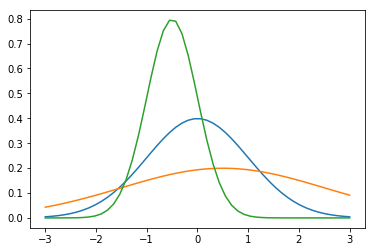

In [28]:
# 另一种则是将 `loc, scale` 作为参数直接输给 `norm` 生成相应的分布：
p = plot(x, norm(loc=0, scale=1).pdf(x))
p = plot(x, norm(loc=0.5, scale=2).pdf(x))
p = plot(x, norm(loc=-0.5, scale=.5).pdf(x))

In [29]:
# 其他连续分布
from scipy.stats import lognorm, t, dweibull

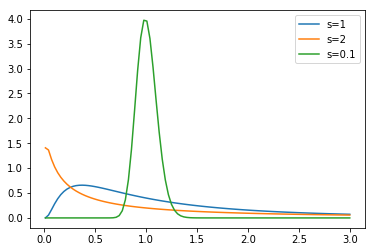

In [30]:
x = linspace(0.01, 3, 100)

plot(x, lognorm.pdf(x, 1), label='s=1')
plot(x, lognorm.pdf(x, 2), label='s=2')
plot(x, lognorm.pdf(x, .1), label='s=0.1')

legend()

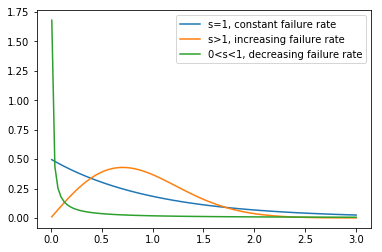

In [31]:
# 不同的韦氏分布
x = linspace(0.01, 3, 100)

plot(x, dweibull.pdf(x, 1), label='s=1, constant failure rate')
plot(x, dweibull.pdf(x, 2), label='s>1, increasing failure rate')
plot(x, dweibull.pdf(x, .1), label='0<s<1, decreasing failure rate')

legend()

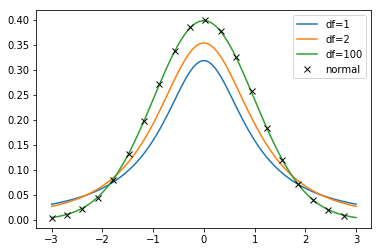

In [32]:
# 不同自由度的学生 t 分布：
x = linspace(-3, 3, 100)

plot(x, t.pdf(x, 1), label='df=1')
plot(x, t.pdf(x, 2), label='df=2')
plot(x, t.pdf(x, 100), label='df=100')
plot(x[::5], norm.pdf(x[::5]), 'kx', label='normal')

legend()

In [33]:
# 离散分布
from scipy.stats import binom, poisson, randint

In [34]:
# 离散分布没有概率密度函数，但是有概率质量函数。

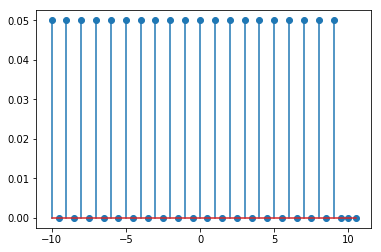

In [35]:
high = 10
low = -10

x = arange(low, high+1, 0.5)
p = stem(x, randint(low, high).pmf(x))  # 杆状图

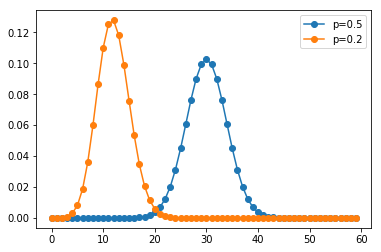

In [36]:
# 二项分布
num_trials = 60
x = arange(num_trials)

plot(x, binom(num_trials, 0.5).pmf(x), 'o-', label='p=0.5')
plot(x, binom(num_trials, 0.2).pmf(x), 'o-', label='p=0.2')

legend()

[泊松分布](https://zh.wikipedia.org/wiki/%E6%B3%8A%E6%9D%BE%E5%88%86%E4%BD%88)：

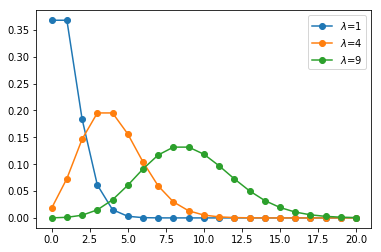

In [37]:
x = arange(0,21)

plot(x, poisson(1).pmf(x), 'o-', label=r'$\lambda$=1')
plot(x, poisson(4).pmf(x), 'o-', label=r'$\lambda$=4')
plot(x, poisson(9).pmf(x), 'o-', label=r'$\lambda$=9')

legend()

In [38]:
# 自定义离散分布
from scipy.stats import rv_discrete

In [39]:
# 一个不均匀的骰子对应的离散值及其概率：
xk = [1, 2, 3, 4, 5, 6]
pk = [.3, .35, .25, .05, .025, .025]

In [40]:
# 定义离散分布：
loaded = rv_discrete(values=(xk, pk))

In [41]:
loaded

In [42]:
loaded.rvs(size=2)

array([3, 2])

In [43]:
# 产生100个随机变量，将直方图与概率质量函数进行比较：

<StemContainer object of 3 artists>

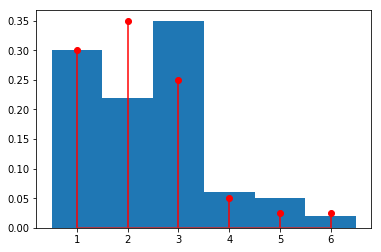

In [45]:
samples = loaded.rvs(size=100)
bins = linspace(.5,6.5,7)

hist(samples, bins=bins, density=True)
stem(xk, loaded.pmf(xk), markerfmt='ro', linefmt='r-')

In [46]:
# 假设检验

导入相关的函数：

- 正态分布
- 独立双样本 `t` 检验，配对样本 `t` 检验，单样本 `t` 检验
- 学生 `t` 分布

`t` 检验的相关内容请参考：
- 百度百科-`t` 检验：http://baike.baidu.com/view/557340.htm
- 维基百科-学生 `t` 检验：https://en.wikipedia.org/wiki/Student%27s_t-test

In [47]:
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import t

In [48]:
# 独立样本t检验
n1 = norm(loc=0.3,scale= 1.0)
n2 = norm(loc = 0 ,scale= 1.0)

In [49]:
# 从分布中产生两组随机样本：

In [50]:
n1_samples = n1.rvs(size=100)
n2_samples = n2.rvs(size=100)

In [51]:
samples = hstack((n1_samples, n2_samples)) 

In [52]:
# 最大似然估计
loc, scale = norm.fit(samples)
n = norm(loc=loc, scale=scale)

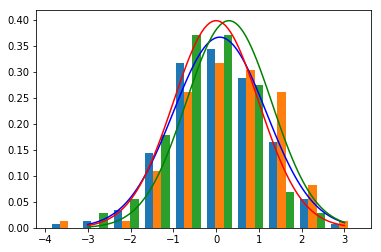

In [54]:
x = linspace(-3,3,100)

hist([samples, n1_samples, n2_samples], density=True)
plot(x, n.pdf(x), 'b-')
plot(x, n1.pdf(x), 'g-')
plot(x, n2.pdf(x), 'r-')